In [1]:
#Librería que necesitamos para la actividad

import numpy as np
import matplotlib.pyplot as plt

import cv2 as cv    #Computer vision
import os           #Operative system
import re           #Regular expressions

In [2]:
# Implementación de la función getImage()
# Recibe tres parámetros: path, size, flatten

def getImage(path, size=(32, 32), flatten=False):
  img=cv.imread(path, cv.IMREAD_GRAYSCALE)
  img=cv.resize(img, size)
  #Podemos agregar operaciones de preprocesamiento
  img = img/255.
  if flatten is True:
    img=img.flatten()
  return img

In [3]:
# Probemos la implementación de la función
path="/content/drive/MyDrive/DL2023p-msc/S03/actividad 02/data/faces/mitchell/mitchell_left_angry_open.pgm"
image=getImage(path, (28, 28), True)
print(image.shape)
image=getImage(path, (54, 54), False)
print(image.shape)

(784,)
(54, 54)


In [4]:
# Implementación de la función getLabel()
# Recibe un parámetro: filename
# Straight, Up, Left, Rigth, Sunglasses
def getLabel(filename):
  label = np.zeros(5)
  if re.search('straight', filename) is not None:
    label[0]=1
  elif re.search('up', filename) is not None:
    label[1]=1
  elif re.search('left', filename) is not None:
    label[2]=1
  elif re.search('rigth', filename) is not None:
    label[3]=1
  
  if re.search('sunglasses', filename) is not None:
    label[4]=1
  return label

In [5]:
#Probemos nuestra función
label=getLabel("mitchell_left_angry_open.pgm")
print(label)

[0. 0. 1. 0. 0.]


In [6]:
#Implementación de la función dataset_from_directory()
def dataset_from_directory(path):
  #Definamos dos listas para almacenar los tensores
  images=[]
  labels=[]
  folders = os.listdir(path)
  for f in folders:
    files=os.listdir(os.path.join(path, f))
    for file in files:
      images.append(getImage(os.path.join(os.path.join(path, f), file)))
      labels.append(getLabel(file))
  X = np.array(images)
  Y = np.array(labels)
  return X, 

In [7]:
path="/content/drive/MyDrive/DL2023p-msc/S03/actividad 02/data/faces"
X, Y = dataset_from_directory(path)

In [8]:
print(X.shape, Y.shape)

(752, 32, 32) (752, 5)


In [9]:
def show_example(x, y):
  plt.axis('off')
  plt.imshow(x, cmap='gray')
  plt.title(f"True label: {y}")

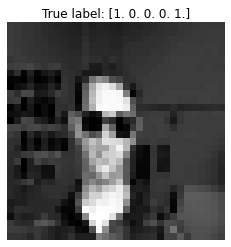

In [11]:
show_example(X[5], Y[5])